Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Extract data.

In [2]:
customer_churn = pd.read_csv(r"C:\Users\Esther\OneDrive\Desktop\Datasets\telecom_churn.csv")
customer_churn.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


# 1. What percentage of customers churned (Churn = 1)?

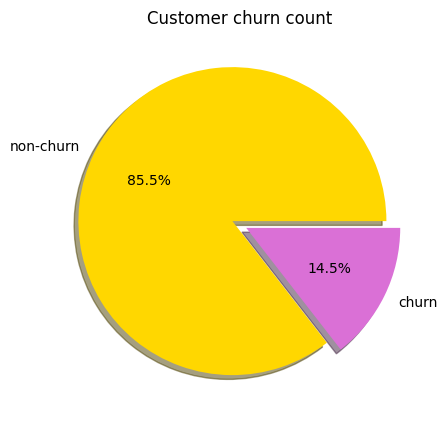

In [14]:
churn_count = customer_churn['Churn'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(churn_count, labels= ['non-churn', 'churn'], autopct='%1.1f%%', colors=['gold', 'orchid'], shadow=True, explode=[0.05, 0.05])
plt.title('Customer churn count')
plt.show()

- The telcom company seems to have retained a good number of their customers, that is 
85.5% with only 14.5% cancelling their services.

# 2. Are there any patterns related to churn based on Contract renewal and Data plan?

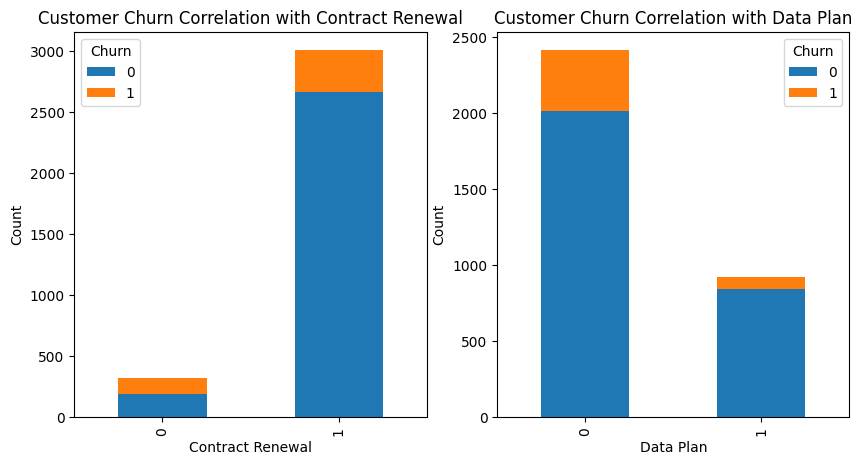

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

contract_renewal_ct = pd.crosstab(customer_churn['ContractRenewal'], customer_churn['Churn'])
contract_renewal_ct.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Customer Churn Correlation with Contract Renewal')
ax[0].set_xlabel('Contract Renewal')
ax[0].set_ylabel('Count')

contract_renewal_ct = pd.crosstab(customer_churn['DataPlan'], customer_churn['Churn'])
contract_renewal_ct.plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Customer Churn Correlation with Data Plan')
ax[1].set_xlabel('Data Plan')
ax[1].set_ylabel('Count')

plt.show()

- In the first graph, customers who cancelled their services after renewing their contract were more compared to those who never renewed their contract. 
- Whereas, in the second graph, customers without a data plan are more likely to churn.
- Overall, both graphs suggest that contract renewal and data plan, influence customer churn. The Telecom service provider may want to focus on retaining customers who fall into these categories by coming up with better dataplans which might as well improve on the retention of customers on the renewal of contracts.

# 3. Is there a correlation between account weeks and churn?

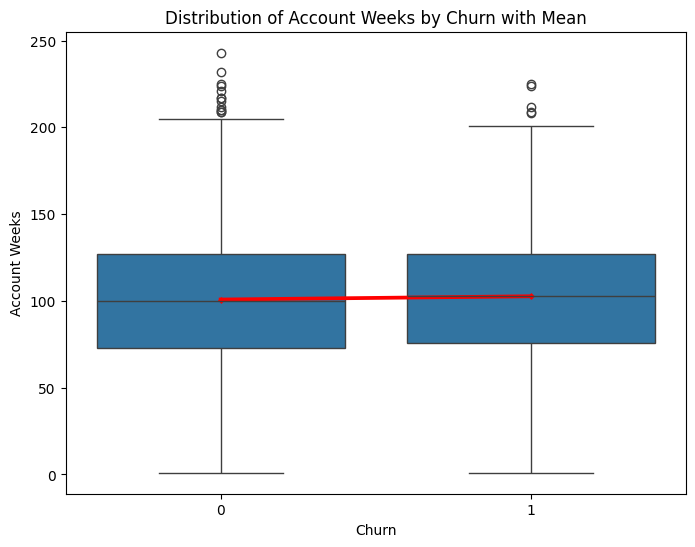

In [31]:
correlation = customer_churn['AccountWeeks'].corr(customer_churn['Churn'])
correlation

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='AccountWeeks', data=customer_churn)
mean_values = customer_churn.groupby('Churn')['AccountWeeks'].mean().values
sns.pointplot(x=[0, 1], y=mean_values, color='red', markers='D', markersize=1.5, errorbar=None)
plt.title('Distribution of Account Weeks by Churn with Mean')
plt.xlabel('Churn')
plt.ylabel('Account Weeks')
plt.show()

# 4. What is the average monthly charge for customers?

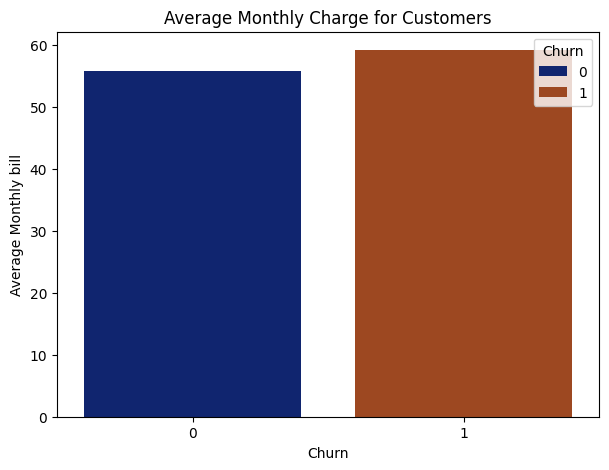

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(x='Churn', y='MonthlyCharge', data=customer_churn, errorbar=None, hue='Churn', palette='dark')
plt.title('Average Monthly Charge for Customers')
plt.xlabel('Churn')
plt.ylabel('Average Monthly bill')
plt.show()

- With the average monthly bill for churned customers being slightly higher than the retained customers, It could imply that the current billing rate of the service provider could be high and hence affecting the customers cancelling their services. 
- As a remedy to this, the billing rates could be revised to make them more appealing to the customers.

# 5. How does data usage impact churn?

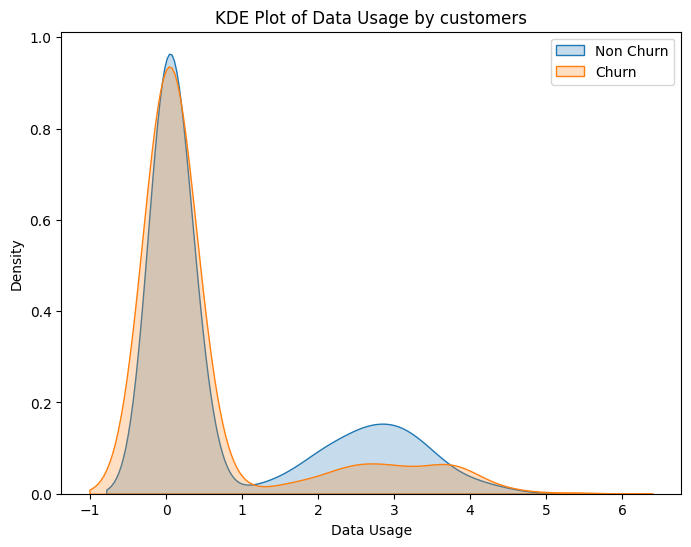

In [44]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=customer_churn[customer_churn['Churn'] == 0]['DataUsage'], label='Non Churn', fill=True)
sns.kdeplot(data=customer_churn[customer_churn['Churn'] == 1]['DataUsage'], label='Churn', fill=True)
plt.title('KDE Plot of Data Usage by customers')
plt.xlabel('Data Usage')
plt.ylabel('Density')
plt.legend()
plt.show()

- The data usage of both customers is quite low with a majority of them either not utilizing any data or using up less than 1gb of data.
- A difference is noted within the customers who use up a monthly data ranging between 1-5 gb of data. With a good number of non churned customers registering  a usage of 3Gb as their highest usage whereas, the churned customers have a considerably lower data usage averaging between 2.5 and 3.8 Gb as the highest  usage.
- Evidently, data usage is significantly low in both groups maybe due to connectivity issues or data rates. Modifications in this area could help improve the performance of the item.

# 6. How does the average day usage (DayMins) compare between churned and non-churned customers?

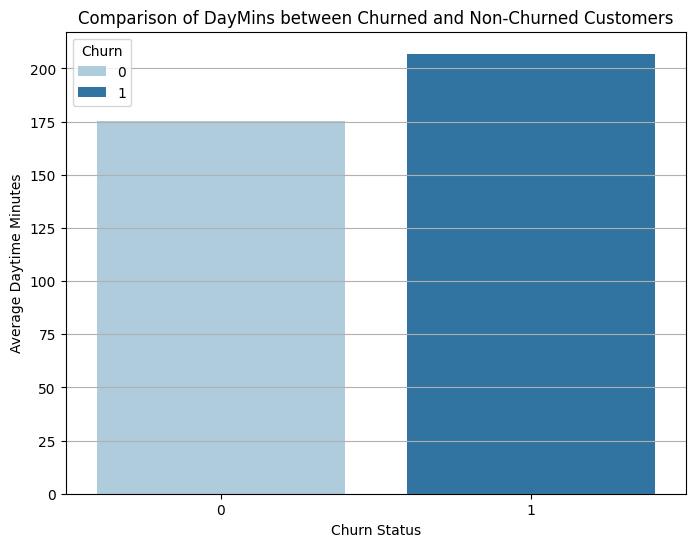

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='DayMins', data=customer_churn, errorbar=None, hue='Churn', palette='Paired')
plt.xlabel('Churn Status')
plt.ylabel('Average Daytime Minutes')
plt.title('Comparison of DayMins between Churned and Non-Churned Customers')
plt.grid(axis='y')
plt.show()

- The average daytime minutes (DayMins) are generally higher for customers who have churned compared to those who have not churned. This suggests that customers who tend to use more daytime minutes are more likely to churn.
- The high usage might indicate that customers rely heavily on the service but were not satisfied with the services and would rather opt to leave.

# 7. How many customer service calls did churned customers make on average?

2.229813664596273


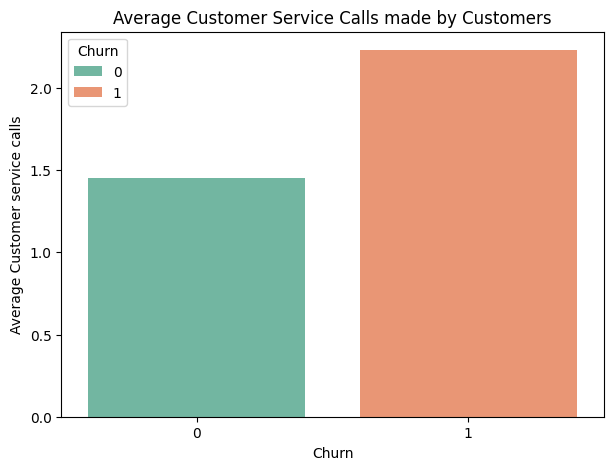

In [24]:
Avg_custservcalls= customer_churn[customer_churn['Churn']==1]['CustServCalls'].mean()
print(Avg_custservcalls)

plt.figure(figsize=(7,5))
sns.barplot(x='Churn', y='CustServCalls', data=customer_churn, errorbar=None, hue='Churn', palette='Set2')
plt.title('Average Customer Service Calls made by Customers')
plt.xlabel('Churn')
plt.ylabel('Average Customer service calls')
plt.show()

- The average customer service calls that were made by the churned customers were more as opposed to the other customers. This signifies there might be a number of items that the customers have an issue with or are disatisfied with.  

# 8. What is the distribution of RoamMins for both churned and non-churned customers?

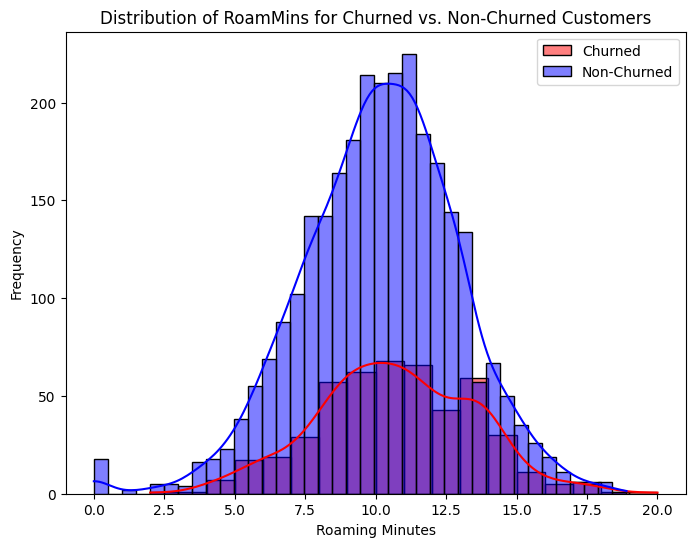

In [9]:
churned = customer_churn[customer_churn['Churn'] == 1]
non_churned = customer_churn[customer_churn['Churn'] == 0]

# Create histograms
plt.figure(figsize=(8, 6))
sns.histplot(churned['RoamMins'], kde=True, label='Churned', color='red')
sns.histplot(non_churned['RoamMins'], kde=True, label='Non-Churned', color='blue')
plt.xlabel('Roaming Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of RoamMins for Churned vs. Non-Churned Customers')
plt.legend()
plt.show()

- From the graph we can see that both churned and non-churned customers have similar average roaming minutes; which is around 10mins, although, there is a larger spread in the roaming minutes for churned customers. This could imply that customers with either very low or very high roaming minutes might be more likely to churn.
- Customers with roaming minutes significantly below or above the average might be at higher risk of churn while customers with moderate roaming usage seem to be less likely to churn.
- As a means to intervene, Customers with low roaming minutes could be given incentives to increase their usage which could subsequently improve their engagement and potentially reduce churning.
